## Observations and Insights 

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "left")

# Display the data table for preview
combined_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice.
pd.DataFrame({"Total Mice":[len(combined_df["Mouse ID"].unique())]})

,Total Mice
0,249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dupes = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
mice_dupes.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df["Mouse ID"]==str(mice_dupes.iloc[0,0]),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_index = combined_df[combined_df["Mouse ID"]==str(mice_dupes.iloc[0,0])].index
mice_clean = combined_df.drop(drop_index)
mice_clean.reset_index(inplace=True)

In [9]:
# Checking the number of mice in the clean DataFrame.
pd.DataFrame({"Total Mice":[len(mice_clean["Mouse ID"].unique())]})

,Total Mice
0,248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = mice_clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = mice_clean.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = mice_clean.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard = mice_clean.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = mice_clean.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

updated_table = pd.DataFrame(mean)
updated_table_new = updated_table.rename(columns={"Tumor Volume (mm3)": "Mean"})

updated_table_new["Median"] = median
updated_table_new["Variance"] = variance
updated_table_new["Std"] = standard
updated_table_new["Sem"] = sem

updated_table_new


,Mean,Median,Variance,Std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

updated_table_alt = mice_clean.groupby('Drug Regimen')
updated_table_new_alt = updated_table_alt.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
updated_table_new_alt

C:\Users\16308\AppData\Local\Temp\ipykernel_8080\1850888766.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  updated_table_new_alt = updated_table_alt.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total # of Mice'>

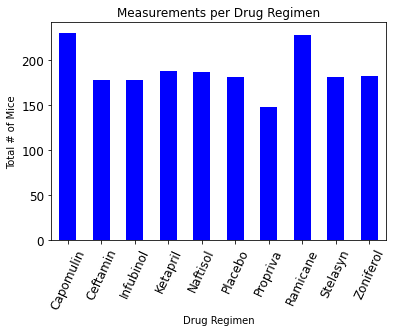

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_count = updated_table_alt["Mouse ID"].count()
drug_regimen_pdplot = drug_regimen_count.plot.bar( rot = 65, title = "Measurements per Drug Regimen", fontsize =12, color = "b")
drug_regimen_pdplot.set_xlabel("Drug Regimen")
drug_regimen_pdplot.set_ylabel("Total # of Mice")
drug_regimen_pdplot

In [13]:
drug_regimen_count.head(10)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Total Mice')

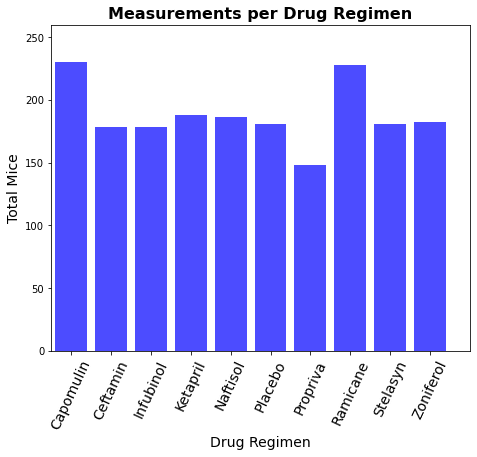

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen = np.arange(len(drug_regimen_count))
total_mice = drug_regimen_count

#Create ticks 
ticks = list(drug_regimen_count.index.values)
tick_loc = [value for value in drug_regimen]

# Coding where to write the figures
plt.figure(figsize=(7.5,6))
plt.bar(drug_regimen, total_mice, color ='b', alpha=0.7, align="center")
plt.xticks(tick_loc, ticks, rotation="65", fontsize = 14)

# Set x and y limits
plt.xlim(-0.5, len(drug_regimen))
plt.ylim(0, 260)

# Adding title and labels
plt.title("Measurements per Drug Regimen",fontsize=16, fontweight='bold')
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Total Mice",fontsize=14)

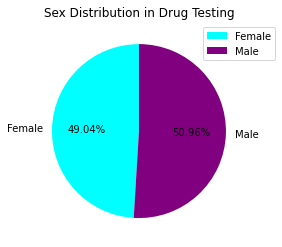

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_fvsm = mice_clean.groupby(["Sex"]).count()
mice_piechart = mouse_fvsm.plot(kind="pie", y='Mouse ID', title=("Sex Distribution in Drug Testing"),colors = ["cyan","purple"],autopct = "%.2f%%", startangle=90)
mice_piechart.set_ylabel("")

#Adding legend and updating location
mice_piechart.legend(loc='upper right', frameon=True, bbox_to_anchor=(1.15, 1))

Male      958
Female    922
Name: Sex, dtype: int64

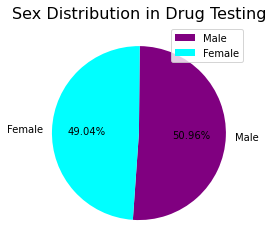

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_fvsm2 = mice_clean["Sex"].value_counts()

# Variables to use in pie chart 
colors =["purple", "cyan"]
labels = list(mouse_fvsm2.index)

# create pie chart based upon the above data
plt.pie(mouse_fvsm2, labels=labels, colors = colors, autopct="%1.2f%%", startangle=266) 
# Adding legend and title to pie chart
plt.title("Sex Distribution in Drug Testing",fontsize=16)
plt.legend(labels, loc='upper right')
mouse_fvsm2

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=mice_clean.groupby(['Mouse ID'])['Timepoint'].max()
greatest_timepoint 

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [24]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tv_df = pd.merge(greatest_timepoint , mice_clean, on=(["Mouse ID","Timepoint"]))
tv_df

,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,463,Infubinol,Female,20,23,67.973419,2
1,a251,45,473,Infubinol,Female,21,25,65.525743,1
2,a262,45,483,Placebo,Female,17,29,70.717621,4
3,a275,45,493,Ceftamin,Female,20,28,62.999356,3
4,a366,30,500,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...,...
243,z435,10,1862,Propriva,Female,12,26,48.710661,0
244,z578,45,84,Ramicane,Male,11,16,30.638696,0
245,z581,45,1872,Infubinol,Female,24,25,62.754451,3
246,z795,45,1882,Naftisol,Female,13,29,65.741070,3


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_list:
    tv_regimen = tv_df.loc[tv_df["Drug Regimen"] == treatment]
    tumor_volume= tv_regimen['Tumor Volume (mm3)']    
    
# append tumor info to a new list 
    tumor_volume_data.append(tumor_volume)
    

In [36]:
# Determine outliers using upper and lower bounds
quart0 = tumor_volume_data[0].quantile([.25,.5,.75])
lowerq0 = quart0[0.25]
upperq0 = quart0[0.75]
IQR0 = upperq0-lowerq0

quart1 = tumor_volume_data[1].quantile([.25,.5,.75])
lowerq1 = quart1[0.25]
upperq1 = quart1[0.75]
IQR1 = upperq1-lowerq1

quart2 = tumor_volume_data[2].quantile([.25,.5,.75])
lowerq2 = quart2[0.25]
upperq2 = quart2[0.75]
IQR2 = upperq2-lowerq2

quart3 = tumor_volume_data[3].quantile([.25,.5,.75])
lowerq3 = quart3[0.25]
upperq3 = quart3[0.75]
IQR3 = upperq3-lowerq3
    
#Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

#Print values 
print(f"For {treatment_list[0]}, the values below {lower_bound0} and above {upper_bound0} could be outliers.")
print(f"For {treatment_list[1]}, the values below {lower_bound1} and above {upper_bound1} could be outliers.")
print(f"For {treatment_list[2]}, the values below {lower_bound2} and above {upper_bound2} could be outliers.")
print(f"For {treatment_list[3]}, the values below {lower_bound3} and above {upper_bound3} could be outliers.")

For Capomulin, the values below 20.70456164999999 and above 51.83201549 could be outliers.
For Ramicane, the values below 17.912664470000003 and above 54.30681135 could be outliers.
For Infubinol, the values below 36.83290494999999 and above 82.74144559000001 could be outliers.
For Ceftamin, the values below 25.355449580000002 and above 87.66645829999999 could be outliers.


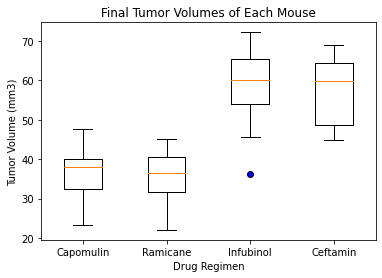

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplt = dict(marker='o', markerfacecolor='b')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes of Each Mouse')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_volume_data, flierprops = boxplt, labels = treatment_list)
plt.show()

## Line and Scatter Plots

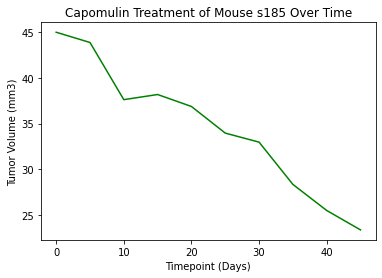

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice = mice_clean.loc[mice_clean["Mouse ID"]==mice_clean.loc[mice_clean["Drug Regimen"]=="Capomulin",:].iloc[0][1],:]
capo_vol = list(capomulin_mice["Tumor Volume (mm3)"])
fig2, ax2 = plt.subplots()
ax2.set_title(f"Capomulin Treatment of Mouse {capomulin_mice.iloc[0][1]} Over Time")
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_xlabel('Timepoint (Days)')
ax2.plot(capomulin_mice["Timepoint"],capomulin_mice["Tumor Volume (mm3)"],color="green")
plt.show()

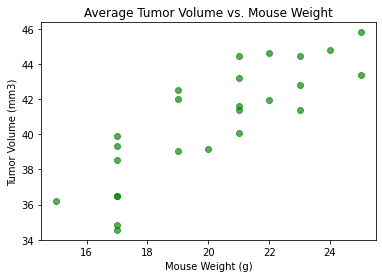

In [59]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
capomulin_mean = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'], alpha=0.65, facecolors="green")
plt.title( "Average Tumor Volume vs. Mouse Weight")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and tumor volume is {correlation}")

The correlation between mouse weight and tumor volume is 0.84


The r-squared is: 0.7088568047708723


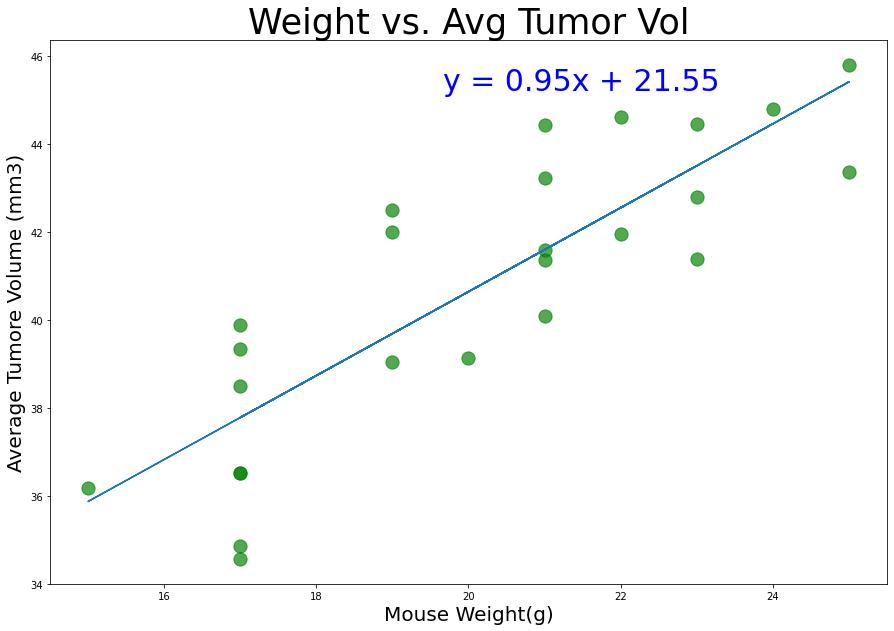

In [80]:
weight = capomulin_mean['Weight (g)']
tumor_vol = capomulin_mean['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_vol)
regress = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(weight,tumor_vol,s=175, alpha=0.68, facecolors="green")
plt.plot(weight,regress)
plt.title('Weight vs. Avg Tumor Vol',fontsize=35)
plt.xlabel('Mouse Weight(g)',fontsize=20)
plt.ylabel('Average Tumore Volume (mm3)',fontsize=20)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="blue")

print(f"The r-squared is: {rvalue**2}")
plt.show()